## Aggregate the network with an optimization method

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import sys
sys.path.append('../src')

from utils import Config, DataProcessor, Network, find_matching_folder
from models import SpatialAggregation, TemporalAggregation
from visuals import Visualization

In [22]:
config = Config(demand = "k-interpolation", time_scale="weekly")
print(config)

Config(year=2013, demand='k-interpolation', k_neighbors_CF=3, k_weight_demand=3, time_scale='weekly', drop_duplicates=True, n_repr=5, k_representative_days=5, weights={'position': 1.0, 'time_series': 1.0, 'duration_curves': 1.0, 'rdc': 1.0, 'intra_correlation': 1.0, 'inter_correlation': 1.0, 'supply_demand_mismatch': 1.0}, file_paths={'nodes': '../DATA/dev/NewEngland-HVbuses.csv', 'demand': '../DATA/dev/demand_hist/county_demand_local_hourly_2013.csv', 'wind_cf': '../DATA/dev/CapacityFactors_ISONE/Wind/cf_Wind_0.22m_2013.nc', 'solar_cf': '../DATA/dev/CapacityFactors_ISONE/Solar/cf_Solar_0.22m_2013.nc', 'demand_lat_lon': '../DATA/Dev/new_england_counties2019.csv'})


In [4]:
nodes_df, demand_df, wind_df, solar_df, wind_CF, solar_CF = DataProcessor.import_and_interpolate_data(config)

Number of duplicates deleted in nodes_df: 2238


In [5]:
# Load CSV data
TimeSeries = {'wind': wind_df, 'solar': solar_df};

In [7]:
network = Network(nodes_df, demand_df, TimeSeries, config)

The 'features' dictionary has been created and can be accessed as '.features'
It is a dictionary with keys for each node in range(0, 2605).
Each value is a dictionary with the features of that node.

Example structure:
network.features[0].keys() = dict_keys(['position', 'time_series', 'duration_curves', 'ramp_duration_curves', 'correlation', 'supply_demand_mismatch'])

Details:
  - Position: A tuple (latitude, longitude) of that node.
  - Time series: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the time series itself.
  - Duration Curves: A dictionary with keys for each time series type in dict_keys(['wind', 'solar'])
    and values as the duration curve of the time series.
  - Ramp Duration Curves (RDCs): A dictionary with keys for each time series type dict_keys(['wind', 'solar'])
    and values as the RDC (found by differentiating and subsequently sorting) of the time series.
  - Correlation: A dictionary with keys as tuples of 

In [8]:
aggregator = SpatialAggregation(network.features, config)

In [23]:
folder_name = find_matching_folder(config, list(TimeSeries.keys()), num_nodes1=len(network.features), num_nodes2=len(network.features))
load = {"yes": folder_name, "no": None}
aggregator.set_distance_metrics(dir_distance_metrics = load["yes"])

Searching for a folder with the following configuraton:
year: 2013, 
demand: k-interpolation, 
k_neighbors_CF: 3, 
k_weight_demand: 3, 
time_scale: weekly, 
drop_duplicates: True,
time series: ['solar', 'wind']
...
Metadata file not found in '2025-03-24 22h20 - Distance Metrics'
Metadata file not found in '2025-03-24 22h23 - Distance Metrics'
Found matching folder: '2025-03-25 00h09 - Distance Metrics'


In [16]:
print(aggregator.distance_metrics.keys())

dict_keys(['duration_curves_distance', 'inter_correlation_distance', 'intra_correlation_distance', 'position_distance', 'rdc_distance', 'supply_demand_mismatch_distance', 'time_series_distance'])


In [9]:
#optimized_assignment_dict = aggregator.optimize()

In [17]:
config.weights = {
        'position': 1.0,
        'time_series': 1.0,
        'duration_curves': 1.0,
        'rdc': 1.0,
        'intra_correlation': 1.0,
        'inter_correlation': 1.0,
        'supply_demand_mismatch': 0
    }
cluster_assignment_dict = aggregator.cluster_KMedoids()

Clustering with 2605 nodes and 5 representatives.
The weights are: {'position': 1.0, 'time_series': 1.0, 'duration_curves': 1.0, 'rdc': 1.0, 'intra_correlation': 1.0, 'inter_correlation': 1.0, 'supply_demand_mismatch': 0}


In [18]:
eval_KMedoids = aggregator.compute_eval_metrics(aggregation_method = 'kmedoids', type="custom")
print(eval_KMedoids)

{'total': 0.15681689474909496, 'position': 0.16646939434289407, 'time_series': 0.21952157734075606, 'duration_curves': 0.22111579992599192, 'rdc': 0.22480790343684295, 'intra_correlation': 0.19639164091418596, 'inter_correlation': 0.06941194728299363, 'supply_demand_mismatch': 0.2115228253684843}


In [ ]:
#eval_opti = aggregator.compute_metrics(aggregation_method = 'optimization', type="custom")

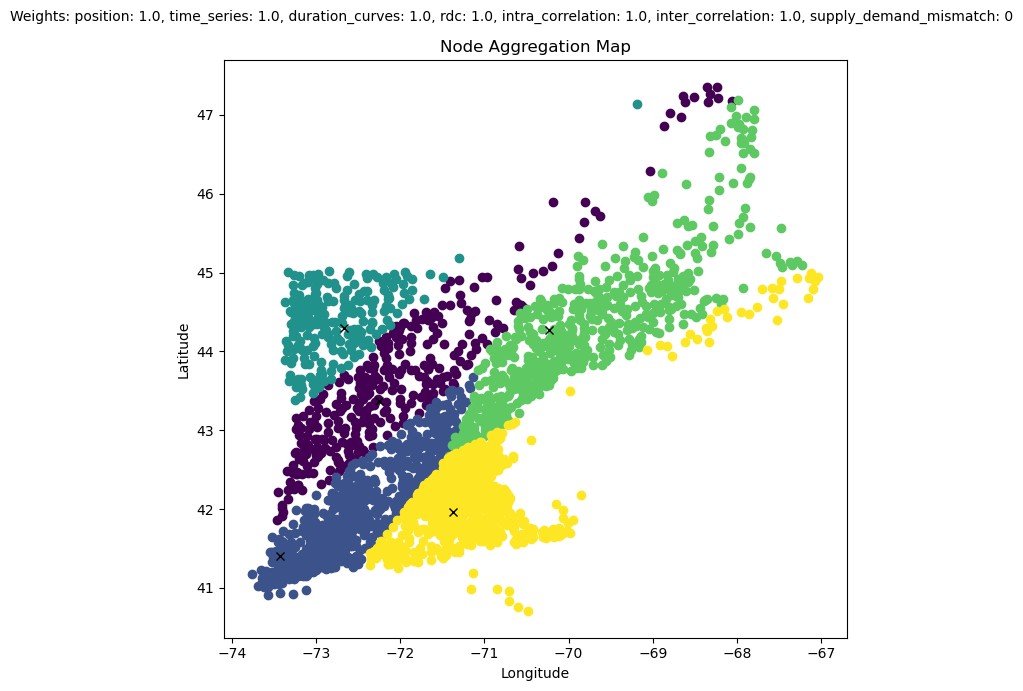

In [19]:
visualizer = Visualization(aggregator)
visualizer.plot_map(aggregation_method='kmedoids')

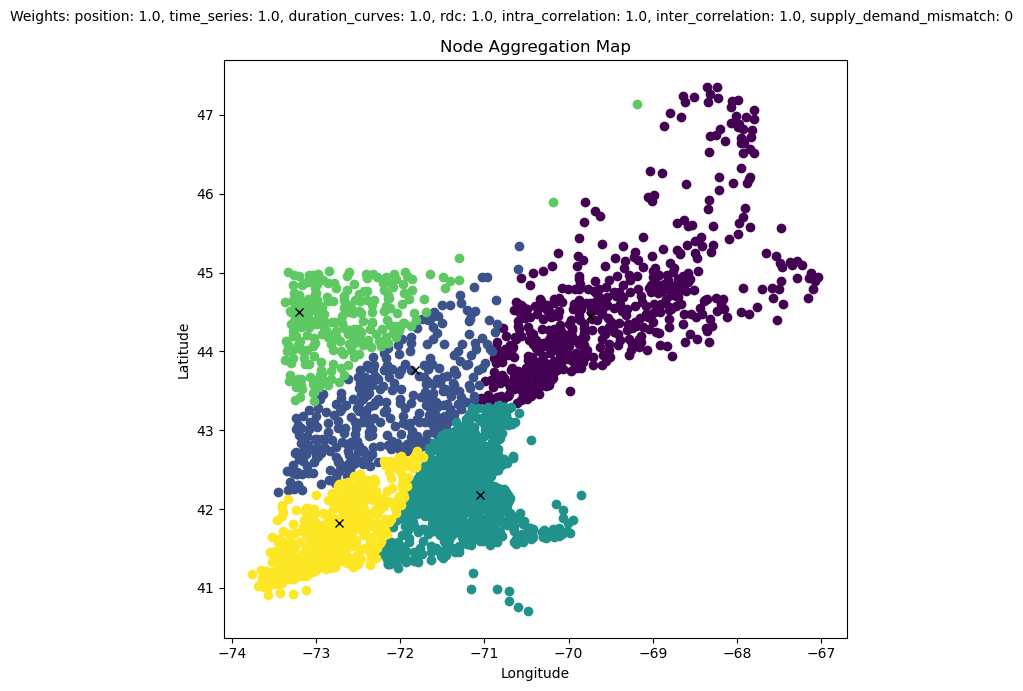

In [24]:
importlib.reload(v)
visualizer = v.Visualization(aggregator)
visualizer.plot_map(aggregation_method='kmedoids')

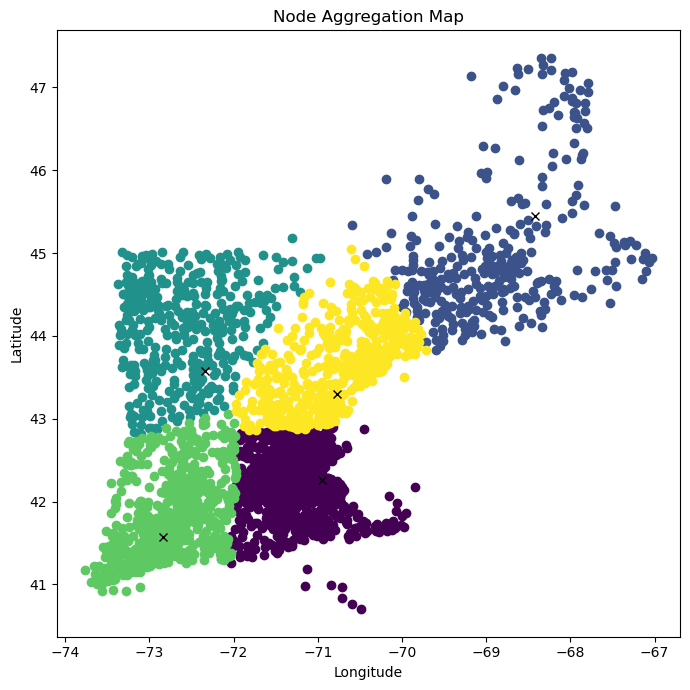

Current weight configuration: {'position': 1.0, 'time_series': 0, 'duration_curves': 0, 'rdc': 0, 'intra_correlation': 0, 'inter_correlation': 0, 'supply_demand_mismatch': 0}
Clustering with 2605 nodes and 5 representatives.
The weights are: {'position': 1.0, 'time_series': 0, 'duration_curves': 0, 'rdc': 0, 'intra_correlation': 0, 'inter_correlation': 0, 'supply_demand_mismatch': 0}


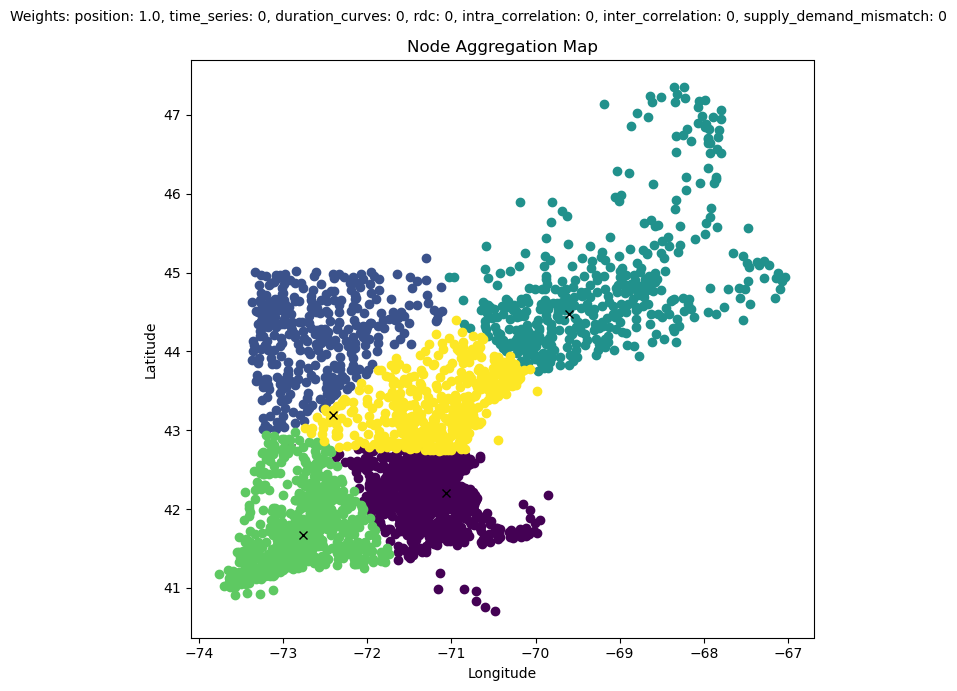

Current weight configuration: {'position': 0, 'time_series': 1.0, 'duration_curves': 0, 'rdc': 0, 'intra_correlation': 0, 'inter_correlation': 0, 'supply_demand_mismatch': 0}
Clustering with 2605 nodes and 5 representatives.
The weights are: {'position': 0, 'time_series': 1.0, 'duration_curves': 0, 'rdc': 0, 'intra_correlation': 0, 'inter_correlation': 0, 'supply_demand_mismatch': 0}


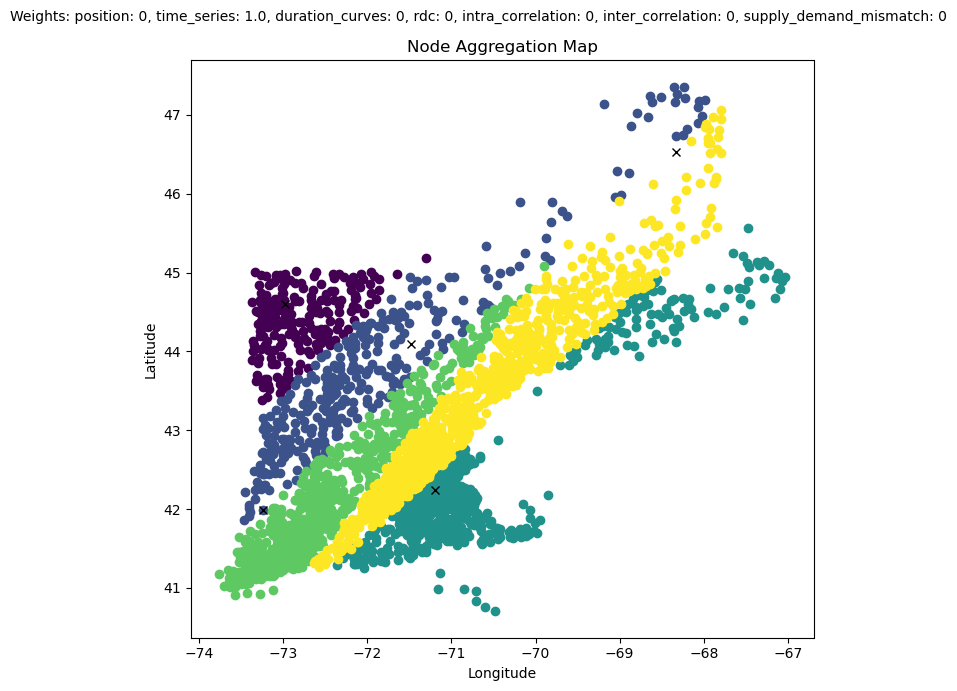

Current weight configuration: {'position': 0, 'time_series': 0, 'duration_curves': 1.0, 'rdc': 0, 'intra_correlation': 0, 'inter_correlation': 0, 'supply_demand_mismatch': 0}
Clustering with 2605 nodes and 5 representatives.
The weights are: {'position': 0, 'time_series': 0, 'duration_curves': 1.0, 'rdc': 0, 'intra_correlation': 0, 'inter_correlation': 0, 'supply_demand_mismatch': 0}


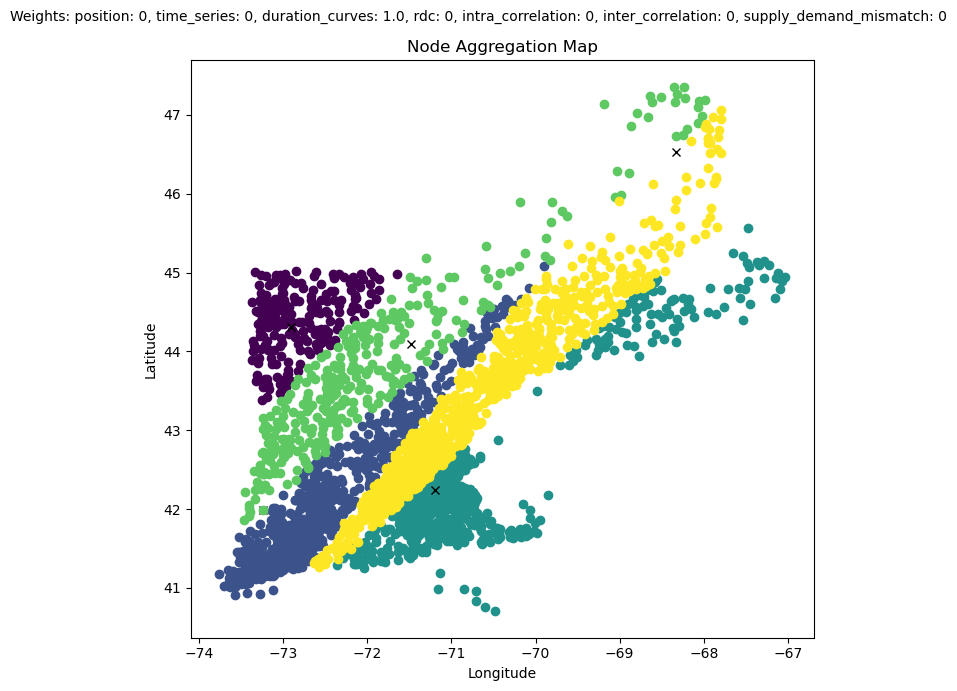

Current weight configuration: {'position': 0, 'time_series': 0, 'duration_curves': 0, 'rdc': 1.0, 'intra_correlation': 0, 'inter_correlation': 0, 'supply_demand_mismatch': 0}
Clustering with 2605 nodes and 5 representatives.
The weights are: {'position': 0, 'time_series': 0, 'duration_curves': 0, 'rdc': 1.0, 'intra_correlation': 0, 'inter_correlation': 0, 'supply_demand_mismatch': 0}


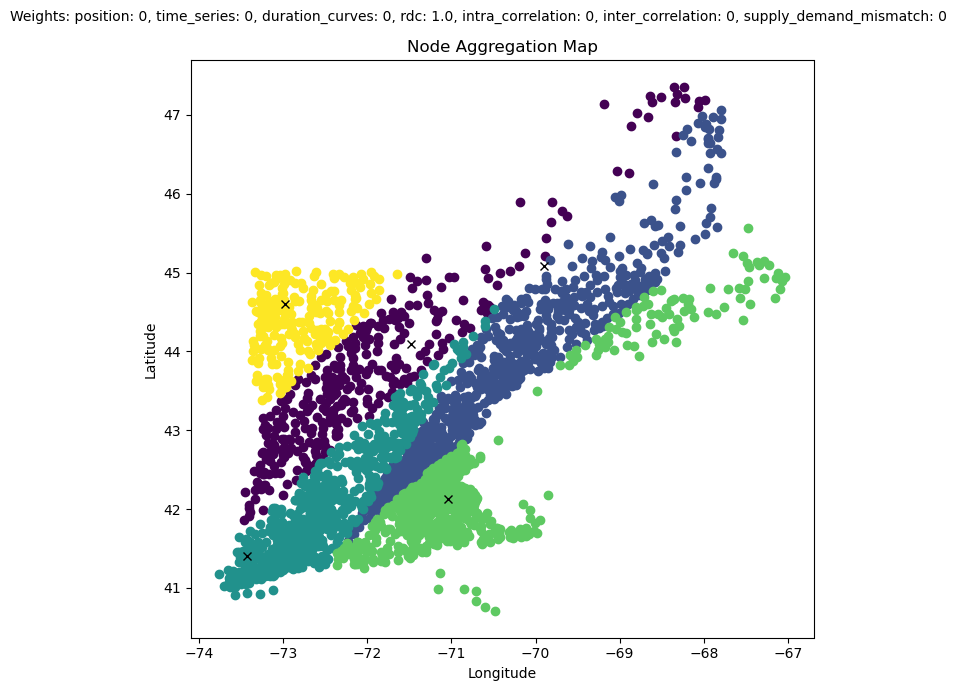

Current weight configuration: {'position': 0, 'time_series': 0, 'duration_curves': 0, 'rdc': 0, 'intra_correlation': 1.0, 'inter_correlation': 0, 'supply_demand_mismatch': 0}
Clustering with 2605 nodes and 5 representatives.
The weights are: {'position': 0, 'time_series': 0, 'duration_curves': 0, 'rdc': 0, 'intra_correlation': 1.0, 'inter_correlation': 0, 'supply_demand_mismatch': 0}


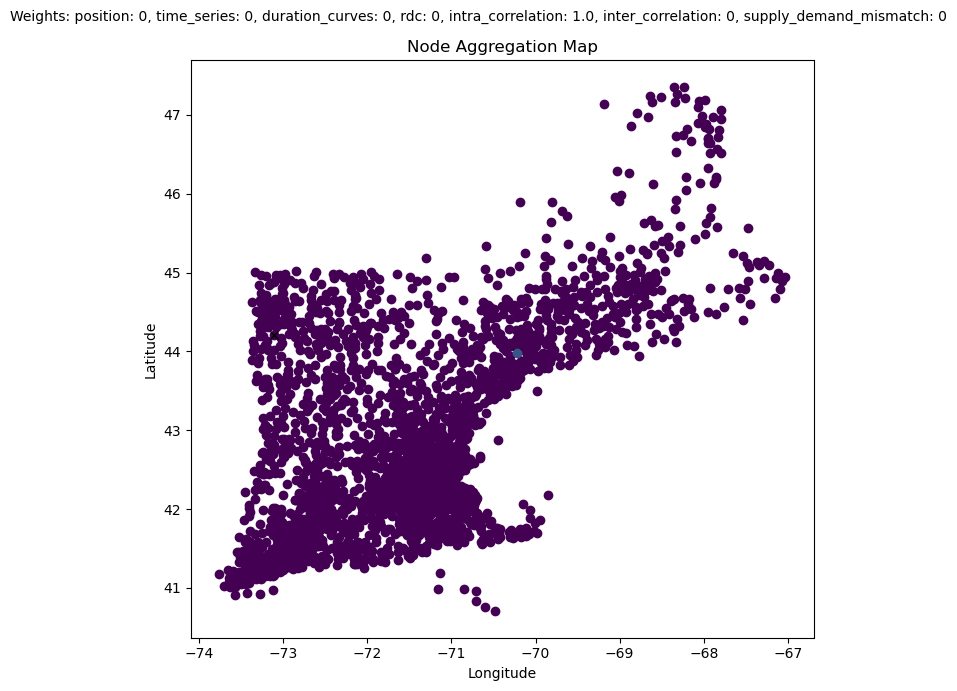

Current weight configuration: {'position': 0, 'time_series': 0, 'duration_curves': 0, 'rdc': 0, 'intra_correlation': 0, 'inter_correlation': 1.0, 'supply_demand_mismatch': 0}
Clustering with 2605 nodes and 5 representatives.
The weights are: {'position': 0, 'time_series': 0, 'duration_curves': 0, 'rdc': 0, 'intra_correlation': 0, 'inter_correlation': 1.0, 'supply_demand_mismatch': 0}


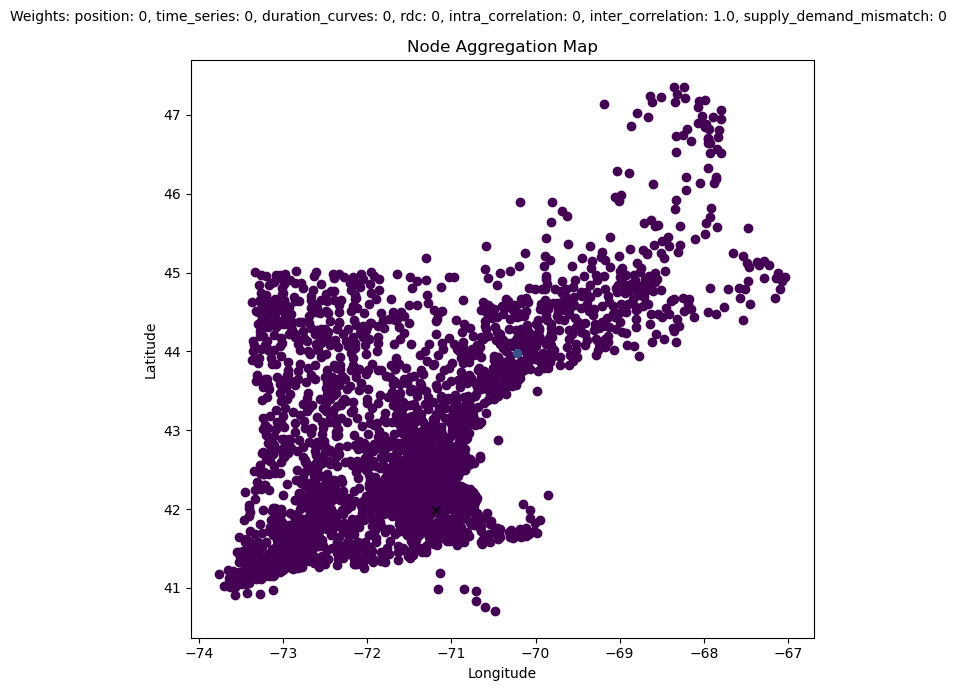

Current weight configuration: {'position': 0, 'time_series': 0, 'duration_curves': 0, 'rdc': 0, 'intra_correlation': 0, 'inter_correlation': 0, 'supply_demand_mismatch': 1.0}
Clustering with 2605 nodes and 5 representatives.
The weights are: {'position': 0, 'time_series': 0, 'duration_curves': 0, 'rdc': 0, 'intra_correlation': 0, 'inter_correlation': 0, 'supply_demand_mismatch': 1.0}


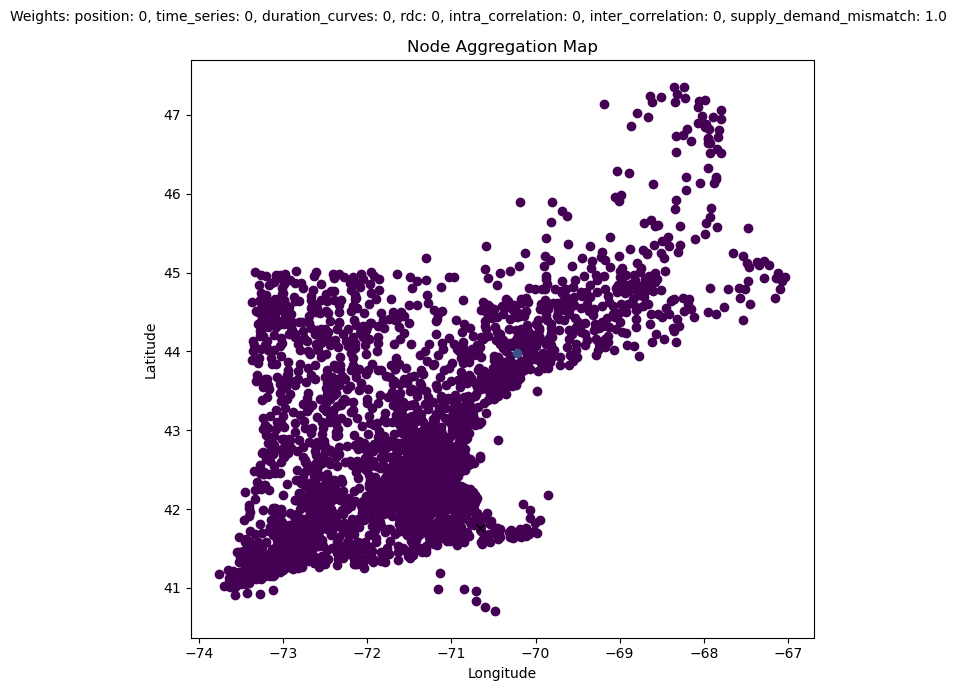

In [32]:
original_weights = {
    'position': 1.0,
    'time_series': 1.0,
    'duration_curves': 1.0,
    'rdc': 1.0,
    'intra_correlation': 1.0,
    'inter_correlation': 1.0,
    'supply_demand_mismatch': 1.0
}

for key in original_weights.keys():
    config.weights = {k: 0 for k in original_weights.keys()}
    config.weights[key] = 1.0
    
    print(f"Current weight configuration: {config.weights}")
    
    cluster_assignment_dict = aggregator.cluster_KMedoids()
    visualizer = v.Visualization(aggregator)
    visualizer.plot_map(aggregation_method='kmedoids')

In [27]:
#visualizer.plot_map(aggregation_method='optimization')

In [30]:
temp = models.TemporalAggregation(aggregator, cluster_assignment_dict, spatial_aggregation_method = "kmedoids")

In [31]:
rep_days = temp.aggregate()

Representative days: [114, 120, 225, 295, 315]
